In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## 25 topics

In [71]:
topics_df = pd.read_csv('../data/char_topics25.csv')
topics_df.head(5)

,film,main_char,gender,top_topic
0,The Doom Generation,amy,1.0,23
1,The Doom Generation,jordan,1.0,6
2,The Doom Generation,xavier,1.0,23
3,The Elephant Man (film),treves,0.0,3
4,The Elephant Man (film),merrick,0.0,8


In [72]:
topics_df[topics_df['film'] == 'Pirates of the Caribbean: The Curse of the Black Pearl']

,film,main_char,gender,top_topic
1342,Pirates of the Caribbean: The Curse of the Bla...,jack,0.0,9
1343,Pirates of the Caribbean: The Curse of the Bla...,elizabeth,1.0,9
1344,Pirates of the Caribbean: The Curse of the Bla...,barbossa,0.0,9
1345,Pirates of the Caribbean: The Curse of the Bla...,will,0.0,9
1346,Pirates of the Caribbean: The Curse of the Bla...,norrington,0.0,12


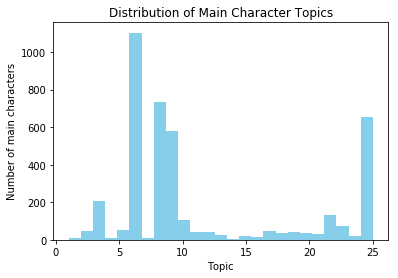

In [66]:
topics_df['top_topic'].hist(bins=25, color='skyblue', figsize=(6,4), grid=False)
plt.xlabel('Topic')
plt.ylabel('Number of main characters')
plt.title('Distribution of Main Character Topics')
plt.savefig('../plots/topic_distr.png')

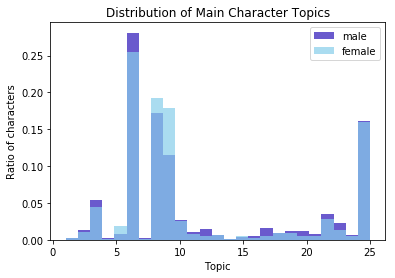

In [67]:
fem_topics = topics_df[topics_df['gender'] == 1.0]['top_topic']
male_topics = topics_df[topics_df['gender'] == 0.0]['top_topic']

fem_weights = np.ones_like(fem_topics) / float(len(fem_topics))
male_weights = np.ones_like(male_topics) / float(len(male_topics))

male_topics.hist(bins=25, color='slateblue', figsize=(6,4), weights=male_weights, grid=False, label='male')
fem_topics.hist(bins=25, color='skyblue', alpha=0.7, figsize=(6,4), weights=fem_weights, grid=False, label='female')
plt.legend()
plt.title('Distribution of Main Character Topics')
plt.xlabel('Topic')
plt.ylabel('Ratio of characters')
plt.savefig('../plots/topic-distr-gender.png')

Text(0,0.5,'Ratio of characters')

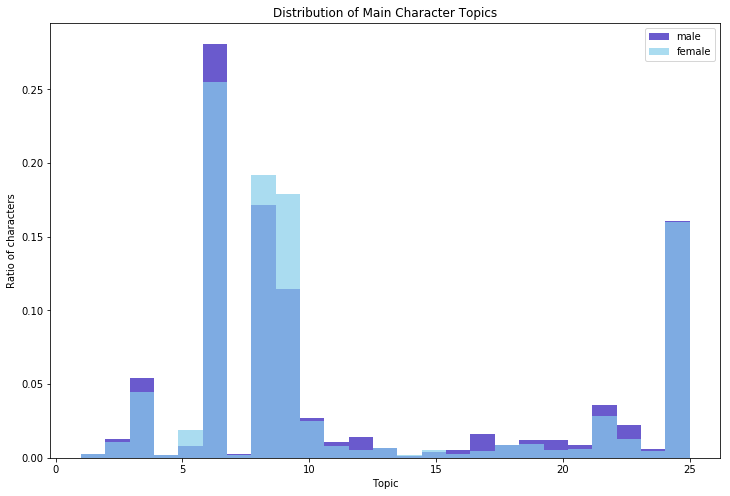

In [73]:
# presentation
fem_topics = topics_df[topics_df['gender'] == 1.0]['top_topic']
male_topics = topics_df[topics_df['gender'] == 0.0]['top_topic']

fem_weights = np.ones_like(fem_topics) / float(len(fem_topics))
male_weights = np.ones_like(male_topics) / float(len(male_topics))

male_topics.hist(bins=25, color='slateblue', figsize=(12,8), weights=male_weights, grid=False, label='male')
fem_topics.hist(bins=25, color='skyblue', alpha=0.7, figsize=(12,8), weights=fem_weights, grid=False, label='female')
plt.legend()
plt.title('Distribution of Main Character Topics')
plt.xlabel('Topic')
plt.ylabel('Ratio of characters')

In [68]:
fem_topic_df = topics_df[topics_df['gender'] == 1.0].groupby('top_topic').count().reset_index()[['top_topic','film']]
fem_topic_df.columns = ['top_topic','female']
num_fem = sum(list(fem_topic_df.female))
fem_topic_df['female'] = fem_topic_df['female'] * 100 / num_fem

male_topic_df = topics_df[topics_df['gender'] == 0.0].groupby('top_topic').count().reset_index()[['top_topic','film']]
male_topic_df.columns = ['top_topic','male']
num_male = sum(list(male_topic_df.male))
male_topic_df['male'] = male_topic_df['male'] * 100 / num_male

In [69]:
gender_topics_df = fem_topic_df.merge(male_topic_df, on='top_topic')
gender_topics_df.to_csv('../data/gender_topics25.csv', index=False)

In [70]:
gender_topics_df

,top_topic,female,male
0,1,0.290023,0.254237
1,2,1.102088,1.271186
2,3,4.466357,5.423729
3,4,0.174014,0.211864
4,5,1.856148,0.805085
5,6,25.522042,28.093220
6,7,0.174014,0.254237
7,8,19.199536,17.161017
8,9,17.865429,11.440678
9,10,2.494200,2.711864


## 10 topics

In [59]:
topics_df = pd.read_csv('../data/char_topics10.csv')
topics_df.head(5)

,film,main_char,gender,top_topic
0,The Doom Generation,amy,1.0,8
1,The Doom Generation,jordan,1.0,8
2,The Doom Generation,xavier,1.0,8
3,The Elephant Man (film),treves,0.0,9
4,The Elephant Man (film),merrick,0.0,4


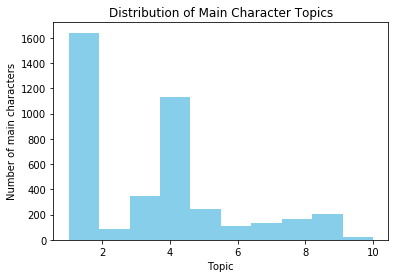

In [60]:
topics_df['top_topic'].hist(bins=10, color='skyblue', figsize=(6,4), grid=False)
plt.xlabel('Topic')
plt.ylabel('Number of main characters')
plt.title('Distribution of Main Character Topics')
plt.savefig('../plots/topic-distr10.png')

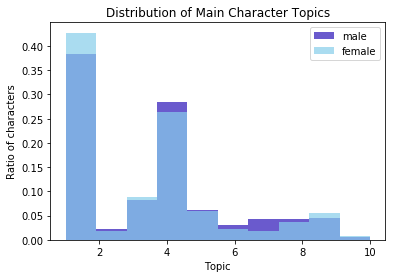

In [61]:
fem_topics = topics_df[topics_df['gender'] == 1.0]['top_topic']
male_topics = topics_df[topics_df['gender'] == 0.0]['top_topic']

fem_weights = np.ones_like(fem_topics) / float(len(fem_topics))
male_weights = np.ones_like(male_topics) / float(len(male_topics))

male_topics.hist(bins=10, color='slateblue', figsize=(6,4), weights=male_weights, grid=False, label='male')
fem_topics.hist(bins=10, color='skyblue', alpha=0.7, figsize=(6,4), weights=fem_weights, grid=False, label='female')
plt.legend()
plt.title('Distribution of Main Character Topics')
plt.xlabel('Topic')
plt.ylabel('Ratio of characters')
plt.savefig('../plots/topic-distr-gender10.png')

In [62]:
fem_topic_df = topics_df[topics_df['gender'] == 1.0].groupby('top_topic').count().reset_index()[['top_topic','film']]
fem_topic_df.columns = ['top_topic','female']
num_fem = sum(list(fem_topic_df.female))
fem_topic_df['female'] = fem_topic_df['female'] * 100 / num_fem

male_topic_df = topics_df[topics_df['gender'] == 0.0].groupby('top_topic').count().reset_index()[['top_topic','film']]
male_topic_df.columns = ['top_topic','male']
num_male = sum(list(male_topic_df.male))
male_topic_df['male'] = male_topic_df['male'] * 100 / num_male

In [63]:
fem_topic_df.merge(male_topic_df, on='top_topic')

,top_topic,female,male
0,1,42.749420,38.305085
1,2,1.914153,2.203390
2,3,8.932715,8.220339
3,4,26.450116,28.516949
4,5,5.858469,6.144068
5,6,2.204176,3.135593
6,7,1.798144,4.194915
7,8,3.770302,4.279661
8,9,5.626450,4.491525
9,10,0.696056,0.508475


In [64]:
gender_topics_df = fem_topic_df.merge(male_topic_df, on='top_topic')
gender_topics_df.to_csv('../data/gender_topics10.csv', index=False)